Aprendizaje y memorización (dilema sesgo - varianza)
===

* 24:54 min | Ultima modificación: Marzo 10, 2020 | [YouTube](https://youtu.be/i4qH8UnrN6k)

Uno de los problemas fundamentales en analítica predictiva es determinar la complejidad óptima del modelo. En este tutorial se discuten los conceptos de aprendizaje y generalización, y como obtener el mejor modelo a partir de los datos.

## Preparación

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Proceso generador de los datos

El proceso generador de datos es un proceso invisible que produce datos observables en el mundo real. Cuando se construye un modelo de regresión este es el proceso que se desea representar. A continuación se presenta un ejemplo numérico para ilustrar los conceptos.

Existe un proceso generador de datos $f(x)$ que produce la salida $y$ ante la entrada $x$. Este proceso es desconocido. Para efectos de este ejemplo, este será representado mediante la siguiente función:

In [2]:
def f(x):
    y = [2 * abs(math.sin(e * math.pi / 4 + 0.75)) for e in x]
    return np.array(y)

En un problema de regresión, se desea aproximar el comportamiento de la línea gris en la siguiente figura, con el fin de producir pronósticos a partir de diferentes valores de $x$.

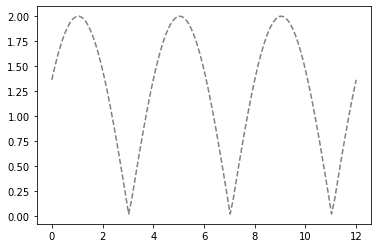

In [3]:
x_real = np.linspace(start=0, stop=12, num=100)
x_data = np.linspace(start=0, stop=12, num=16)

d_real = f(x_real)
plt.plot(x_real, d_real, "--", color="gray")
plt.show()

## Muestra de datos

Cuando se construye un modelo de regresión que aproxime el comportamiento de $f(\cdot)$, los parámetros son calibrados mediante una muestra de datos, representada por las parejas $(x_i, d_i)$. La salida $d_i$ no es exactamente $f(x_i)$, ya que el valor $d_i$ está contaminado con ruído. De esta forma, se desea aproximar el comportamiento de la línea gris mediante los puntos de color negro en la siguiente figura:

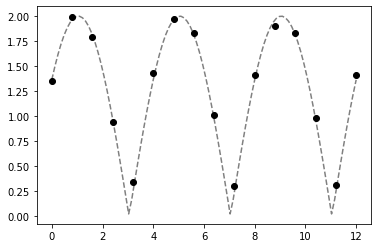

In [4]:
np.random.seed(12345)
d_data = f(x_data) + np.random.normal(0, 0.05, len(x_data))
plt.plot(x_real, d_real, "--", color="gray")
plt.plot(x_data, d_data, "o", color="black")
plt.show()

los cuales son representados como una tabla de patrones de entrada y salida:

In [5]:
print("x\ty")
print("--------------------")
for a, b in zip(x_data, d_data):
    print(round(a, 4), round(b, 4), sep="\t")

x	y
--------------------
0.0	1.353
0.8	1.987
1.6	1.7871
2.4	0.9427
3.2	0.3411
4.0	1.4329
4.8	1.9677
5.6	1.8271
6.4	1.0089
7.2	0.3051
8.0	1.4136
8.8	1.8983
9.6	1.8268
10.4	0.9819
11.2	0.3104
12.0	1.4076


Note que los puntos no caen exactament sobre la línea punteada, lo que dificulta el proceso de aproximación a partir de la muestra de datos. Realmente lo que ve el modelador es:

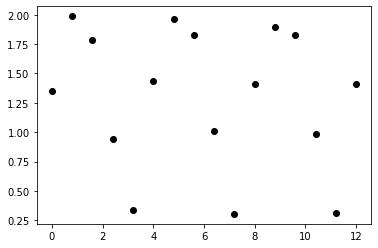

In [6]:
plt.plot(x_data, d_data, "o", color="black")
plt.show()

## Modelo de regresión

Por facilidad, se usará un polinomio de grado $N$ para realizar la regresión:

$$y_p = g(x_p) = \phi_0 + \sum_{n=1}^N \phi_n x_p^n$$

donde el subíndice $p$ representa cada uno de los puntos de la muestra de datos.

## Función de pérdida

En aprendizaje automático, el proceso de aprendizaje consiste en estimar los valores de los parámetros $\phi_n$, para $n=1, ...,N$ que minimizan un error o pérdida. Una selección común es la sumatoria de errores al cuadrado:

$$\text{SSE} = \sum_{p=1}^P (d_p - y_p)^2 = \sum_{p=1}^P [d_p - g(x_p)]^2$$ 

La siguiente función retorna un modelo de grado $N$ a partir de la muestra de datos.

In [7]:
def model(N):
    w = np.polyfit(x_data, d_data, N)
    return np.poly1d(w)

## Ajuste del modelo y error de entrenamiento

Este concepto se refiere a que tan bien reproduce el modelo el comportamiento de los datos. Se mide en términos de la función de pérdida. Acá el modelador debe escoger el grado del polinomio $N$. A medida que el grado $N$ aumenta, el error de entrenamiento (SSE) disminuye.

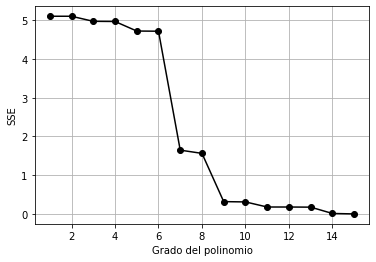

In [8]:
history = []
for n in range(1, 16):
    m = model(n)
    y_data = m(x_data)
    history.append(sum((d_data - y_data) ** 2))
plt.plot(range(1, len(history) + 1), history, "o-", color="k")
plt.xlabel("Grado del polinomio")
plt.ylabel("SSE")
plt.grid()
plt.show()

El ajuste para un polinomio de grado 1 es:

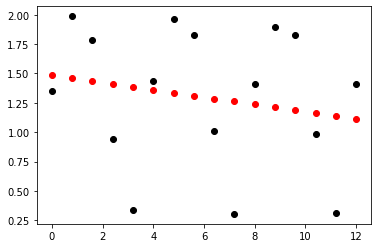

In [9]:
m = model(1)
y_data = m(x_data)
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_data, y_data, "o", color="red")
plt.show()

Mientras que para un polinomio de grado 15 es:

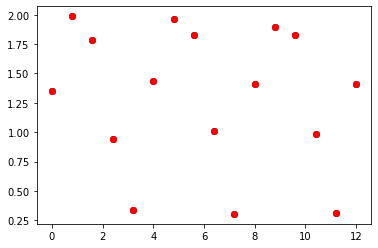

In [10]:
m = model(15)
y_data = m(x_data)
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_data, y_data, "o", color="red")
plt.show()

De esta forma, si se tiene en cuenta únicamente el SSE, se debería escoger el polinomio de mayor grado posible.

## Aprendizaje

El concepto de aprendizaje se refiere a que el modelo realmente capture el comportamiento del proceso generador de los datos (no visible). A continuación, se grafica el proceso subyacente y el comportamiento del polinomio para distintos grados. 

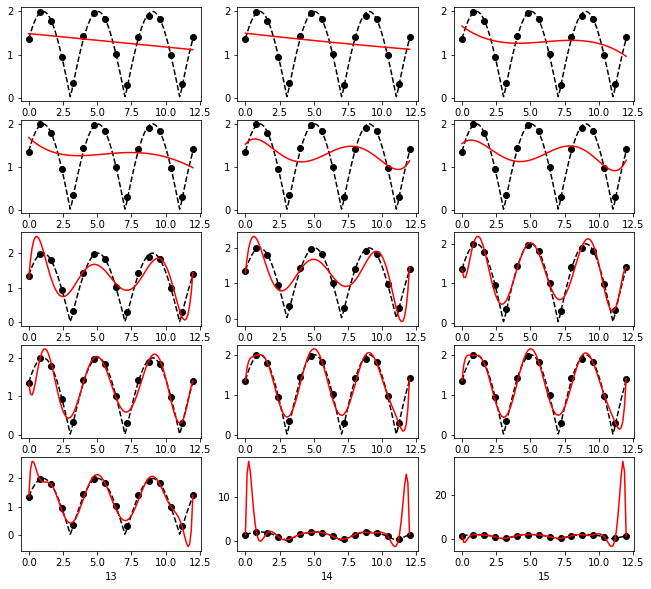

In [11]:
plt.figure(figsize=(11, 10))

grados = list(range(1, 16))

for i, n in enumerate(grados):

    m = model(n)
    y_data = m(x_data)
    y_real = m(x_real)

    plt.subplot(5, 3, i + 1)
    plt.plot(x_data, d_data, "o", color="black")
    plt.plot(x_real, d_real, "--", color="black")
    plt.plot(x_real, y_real, color="red")
    plt.xlabel(n)
    
plt.show()

En este caso, se puede suponer que el grado del polinomio es una medida de la complejidad del modelo; a mayor grado, mayor complejidad.

De acuedo con la gráfica anterior, se reconocen tres casos:


* **Subajuste**: El modelo no reproduce adecuadamente el comportamiento de los datos usados para estimar sus parámetros, ni del comportamiento subyacente.


* **Sobreajuste**: El modelo empieza a memorizar los datos de entrenamiento; es decir, muy bajo error de ajuste entre puntos, pero oscila locamente entre punto y punto para los puntos de la muestra de entrenamiento.


* **Ajuste óptimo**: El modelo tiene un bajo error de ajuste y el comportamiento de la linea roja es muy similar al comportamiento de la línea negra.

## Dilema sesgo - varianza

El término **sesgo** hace referencia a que tan bien se comporta el modelo para la muestra de datos disponible.  

El término **varianza** hace referencia a que tan bien se comporta el modelo para datos nuevos no disponibles hasta ahora (el modelo entra en productivo).

El dilema sesgo - varianza se refiere que a medida que el modelo aumenta su ajuste a los datos de entrenamiento (disminuye el sesgo), existe un punto a partir del cual aumenta la variabilidad de sus resultados para datos nuevos (aumenta la varianza).

En el gráfico anterior, a medida que aumenta la complejidad (el grado) del modelo, hay un mejor ajuste a los datos conocidos (muestra de entrenamiento), pero el modelo produce una salida muy volatil para puntos por fuera de la muestra (que aumenta con la complejidad del modelo).

## Determinación del modelo óptimo (caso ideal)

En el caso ideal, se tiene la información correspondiente a la línea punteada negra (un número infinito de puntos), por lo que podría calcularse la integral del SSE. En la siguiente figura, la línea roja representa el SSE calculado sobre una malla fina de puntos, la cual fue usada para construir la línea punteada.

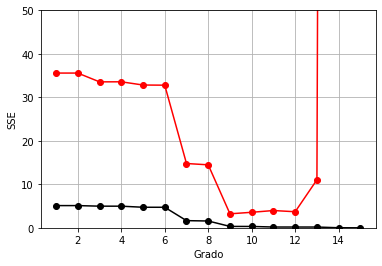

In [12]:
sse_data = []
sse_val = []

for n in range(1, 16):
    m = model(n)
    y_data = m(x_data)
    y_real = m(x_real)
    sse_data.append(sum((d_data - y_data) ** 2))
    sse_val.append(sum((d_real - y_real) ** 2))

plt.plot(range(1, 16), sse_data, "o-", color="black")
plt.plot(range(1, 16), sse_val, "o-", color="red")
plt.ylabel("SSE")
plt.xlabel("Grado")
plt.grid()
plt.ylim(0, 50)
plt.show()

De acuerdo con la figura anterior, el grado óptimo del modelo es 9 (por parsimonia, entre dos modelos con el mismo error, se escoje el que tenga menos parámetros).

## Determinación del modelo óptimo (Caso real)

En la práctica, no se tiene el proceso generador de datos, por lo que la generalización del modelo debe estimarse a partir de la muestra de datos. Para ello, el conjunto disponible de datos se parte en un conjunto de entrenamiento (cómputo de los parámetros del modelo) y un conjunto de prueba (para medir la generalización).

En el siguiente código, 13 puntos son seleccionados aleatoriamente para el conjunto de entrenamiento, mientras que los restantes son usados para el conjunto de prueba.

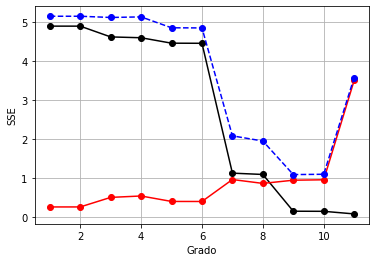

In [13]:
#
# Semilla del generador aleatorio
#
np.random.seed(12345)

sse_fit = []
sse_test = []
sse_total = []

# se escogen aleatoriamente 13 puntos para entrenamiento
# mientras que los 4 restantes se usan para validación
index = np.random.choice(16, 13, replace=False)

x_fit = x_data[index]
d_fit = d_data[index]

x_test = np.delete(x_data, index)
d_test = np.delete(d_data, index)

for n in range(1, 12):

    m = np.poly1d(np.polyfit(x_fit, d_fit, n))

    y_fit = m(x_fit)
    y_test = m(x_test)
    sse_fit.append(sum((d_fit - y_fit) ** 2))
    sse_test.append(sum((d_test - y_test) ** 2))
    sse_total.append(sum((d_fit - y_fit) ** 2) + sum((d_test - y_test) ** 2))

plt.plot(range(1, 12), sse_fit, "o-", color="black")
plt.plot(range(1, 12), sse_test, "o-", color="red")
plt.plot(range(1, 12), sse_total, "o--", color="blue")
plt.ylabel("SSE")
plt.xlabel("Grado")
plt.grid()
plt.show()